<a href="https://colab.research.google.com/github/sksabbir121/Linear-Regression-Health-Costs-Calculator/blob/main/Health_Costs_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [ ]:
dataset = pd.read_csv('insurance.csv')

In [ ]:
print(dataset.tail())

      age     sex   bmi  children smoker     region  expenses
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36


In [ ]:
categorical_columns = ['sex', 'smoker', 'region']
numerical_columns = ['age', 'bmi', 'children']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

In [ ]:
features = dataset.drop(columns=['expenses'])
labels = dataset['expenses']


In [ ]:
features = preprocessor.fit_transform(features)


In [ ]:
train_dataset, test_dataset, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

In [ ]:
def build_model():
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[train_dataset.shape[1]]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.001),
        loss='mse',
        metrics=['mae', 'mse']
    )
    return model

model = build_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
EPOCHS = 100
history = model.fit(
    train_dataset, train_labels,
    epochs=EPOCHS, validation_split=0.2, verbose=1
)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 311070944.0000 - mae: 13173.7354 - mse: 311070944.0000 - val_loss: 310293408.0000 - val_mae: 12652.6406 - val_mse: 310293408.0000
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 325636128.0000 - mae: 13542.7236 - mse: 325636128.0000 - val_loss: 310124864.0000 - val_mae: 12646.2549 - val_mse: 310124832.0000
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 330319968.0000 - mae: 13634.0879 - mse: 330319968.0000 - val_loss: 309716640.0000 - val_mae: 12631.0137 - val_mse: 309716640.0000
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 330776320.0000 - mae: 13630.0674 - mse: 330776320.0000 - val_loss: 308864256.0000 - val_mae: 12599.4746 - val_mse: 308864256.0000
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 299986976.0000 - mae: 12873.2646 - mse: 299986976.0000 - val_loss: 307290656.0000 - val_mae: 12541.4648 - val_mse: 307290656.0000
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

In [ ]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
    print("You passed the challenge. Great job!")
else:
    print("The Mean Abs Error must be less than 3500. Keep trying.")


9/9 - 0s - 4ms/step - loss: 33041462.0000 - mae: 4069.2295 - mse: 33041462.0000
Testing set Mean Abs Error: 4069.23 expenses
The Mean Abs Error must be less than 3500. Keep trying.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


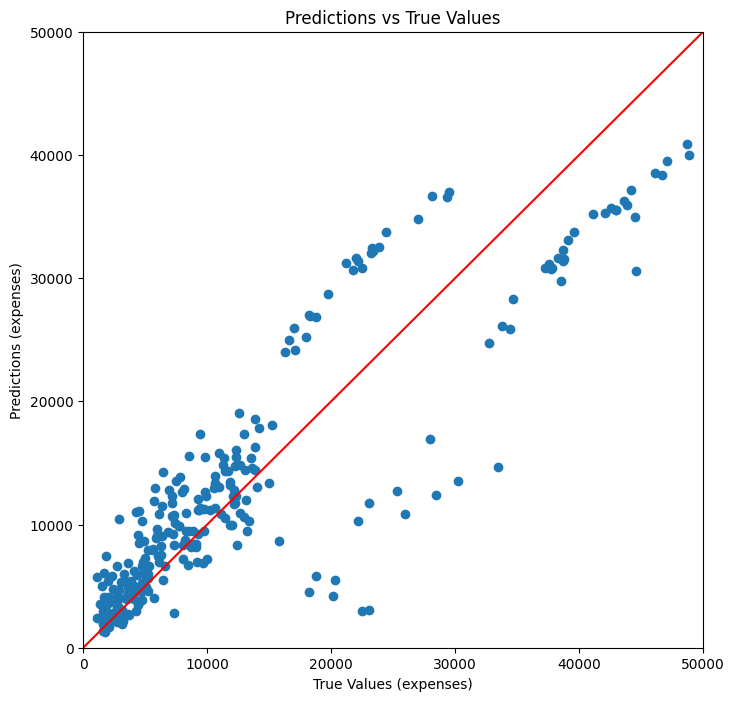

In [ ]:
test_predictions = model.predict(test_dataset).flatten()

plt.figure(figsize=(8, 8))
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, color='red')
plt.title('Predictions vs True Values')
plt.show()